## Initial steps to be followed
### Step 1: Download the csv file from the Google Drive
### Step 2: Upload the csv file in Colab environment
### Step 3 : Load the dataset

In [ ]:
# Import the pandas module
import pandas as pd

# Set the uploaded dataset in a variable
# Use read_csv function to read the uploaded csv file and display it in a tabular format
data = pd.read_csv("/content/train_loan.csv")

data.head() # This will show first few records of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Check the dataset info
# This will help us to identify,
#  1. Total number of columns in the dataset
#  2. Number records in the dataset
#  3. Data types of each column
#  4. Any missing values in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#**Data Processing**

###1. Duplicates Entries

In [ ]:
# Check for duplicate entries in the loan dataset
data.duplicated().sum()

# This shows no duplicate entries in the dataset

np.int64(0)

###2. Missing Values

In [ ]:
# Next check for missing or null values in the dataset
data.isnull().sum()

# There are missing values in both numerical & categorical columns in the dataset

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# Calculate the percentage of null values
round(data.isnull().mean()*100,2)

# Here no column percentage is more than or equal to 40 %
# So no column needs to be dropped
# Only needs to fill the missing values in the dataset

,0
Loan_ID,0.00
Gender,2.12
Married,0.49
Dependents,2.44
Education,0.00
Self_Employed,5.21
ApplicantIncome,0.00
CoapplicantIncome,0.00
LoanAmount,3.58
Loan_Amount_Term,2.28


In [ ]:
# Display the statistical summary of the the dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Display the columns in the dataset
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Assign numerical columns to one variable
numerical_col = data.select_dtypes(include="number").columns
print('\033[1m' + "Numerical Columns from the dataset: "+ '\033[0m',numerical_col)
data[numerical_col]

Numerical Columns from the dataset:  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [ ]:
# Assign the categorical columns to another variable
categorical_col = data.select_dtypes(include="object").columns
print('\033[1m' + "Categorical Columns from the dataset: "+ '\033[0m',categorical_col)
data[categorical_col]

Categorical Columns from the dataset:  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


####Using Simple Imputer to impute the columns of dataset which has missing values

In [ ]:
from sklearn.impute import SimpleImputer
# sklearn - library
# impute -  module
# SimpleImputer - function

# numerical_col = impute using median
# categorical_col = impute using mode

In [ ]:
# This will fill missing values for the numerical columns in the data set
num_impute = SimpleImputer(strategy='median')
data[numerical_col] = num_impute.fit_transform(data[numerical_col])

In [ ]:
# Next check again for missing values in numerical columns in the dataset after Simple Impute
data.isna().sum()

# This shows all numerical missing values are now filled

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# This will fill missing values for the categorical columns in the data set
cat_impute = SimpleImputer(strategy="most_frequent")
data[categorical_col] = cat_impute.fit_transform(data[categorical_col])

In [ ]:
# Next check again for missing values in categorical columns in the dataset after Simple Impute
data.isna().sum()

# This shows all categorical missing values are now filled

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# Check the dataset info again for loan dataset
data.info()

# Now this shows all columns have 614 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


###3. Data Type Change

In [ ]:
# All columns have the correct data type, so in this case no data type change is required

###4. Remove Unwanted Columns

In [ ]:
# Remove those columns from the dataset which are not required
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# From the above Loan_ID column doesn't have any connection with the dataset
# Remove the columns
new_data = data[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

# Display the first few records from the new dataset
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


###5. Outliers - Numerical Columns & Visualization

In [ ]:
# Separate numerical and categoricals columns separately from the new data set
new_data_numerical = new_data.select_dtypes(include="number").columns
new_data_categorical = new_data.select_dtypes(include="object").columns

print('\033[1m' + "Numerical columns from new dataset"+ '\033[0m',new_data_numerical)
print('\033[1m' + "Categorical columns from new dataset"+ '\033[0m',new_data_categorical)

Numerical columns from new dataset Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Categorical columns from new dataset Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


Skewness of ApplicantIncome is 6.539513113994625


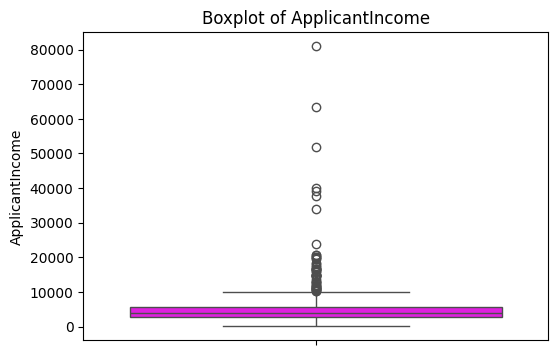

Skewness of CoapplicantIncome is 7.491531216657306


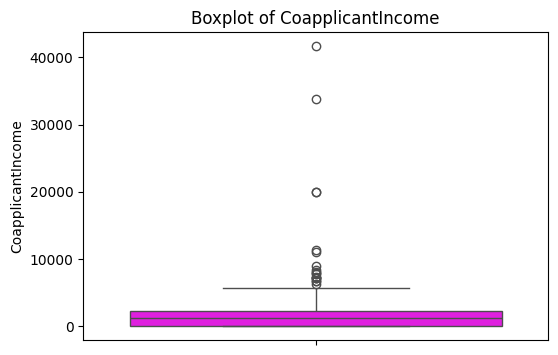

Skewness of LoanAmount is 2.743052748820892


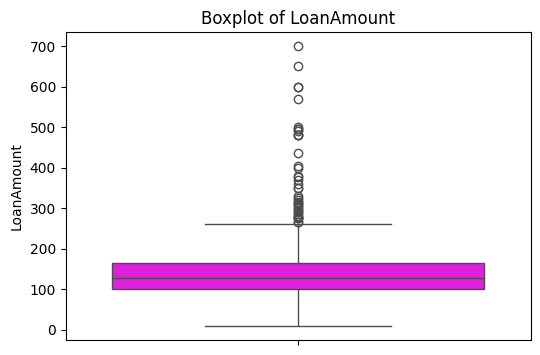

Skewness of Loan_Amount_Term is -2.4021122563890396


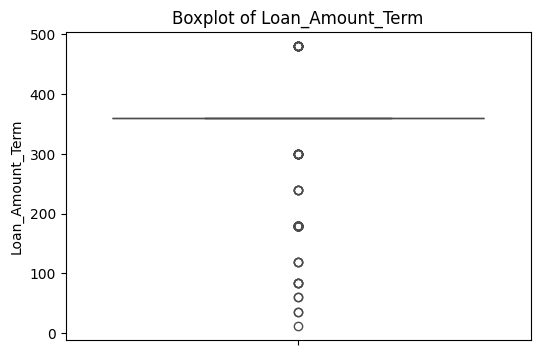

Skewness of Credit_History is -2.0219705924848985


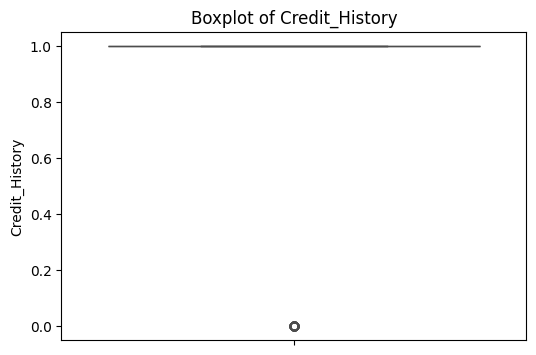

In [ ]:
# Draw Boxplot to find the outliers in numerical columns of new dataset
import seaborn as sns
import matplotlib.pyplot as plt
for i in new_data_numerical:
  plt.figure(figsize=(6,4))
  sns.boxplot(y=new_data[new_data_numerical][i],color='magenta')
  plt.title('Boxplot of '+ i)
  print('\033[1m' + f"Skewness of {i} is {new_data[new_data_numerical][i].skew()}"+ '\033[0m')
  plt.show()

In [ ]:
# The outliers are present in the following columns
# 1. ApplicantIncome   -- This is positively skewed, mean > median
# 2. CoapplicantIncome -- This is positively skewed, mean > median
# 3. LoanAmount        -- This is positively skewed, mean > median
# 4. Loan_Amount_Term  -- This is negatively skewed, mean < median
# 5. Credit_History    -- This is negatively skewed, mean < median

In [ ]:
# Check the statistical summary of new numerical dataset
new_data[new_data_numerical].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
# Function to handle the outliers in the numerical columns of the new dataset
def handle_outliers_numeric(data, numeric_cols):
  for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1

    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR

    # use .loc to modify safely
    # In the below code,
    # : - means all rows
    # col - only this column
    data.loc[:, col] = data[col].clip(LL,UL)

  return data

In [ ]:
# Call the function - handle_outliers_numeric(data, numeric_cols)
# This will cap the outliers in the dataset
handle_outliers_numeric(new_data, new_data_numerical)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# Check the statistical summary of new numerical dataset
new_data[new_data_numerical].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.0,614.0
mean,4617.111564,1419.702231,137.365635,360.0,1.0
std,2479.851729,1624.605892,55.779749,0.0,0.0
min,150.000000,0.000000,9.000000,360.0,1.0
25%,2877.500000,0.000000,100.250000,360.0,1.0
50%,3812.500000,1188.500000,128.000000,360.0,1.0
75%,5795.000000,2297.250000,164.750000,360.0,1.0
max,10171.250000,5743.125000,261.500000,360.0,1.0


Skewness of ApplicantIncome is 1.0398459567416636


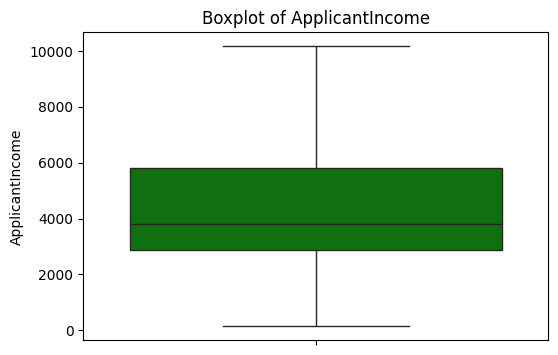

Skewness of CoapplicantIncome is 1.012762761452279


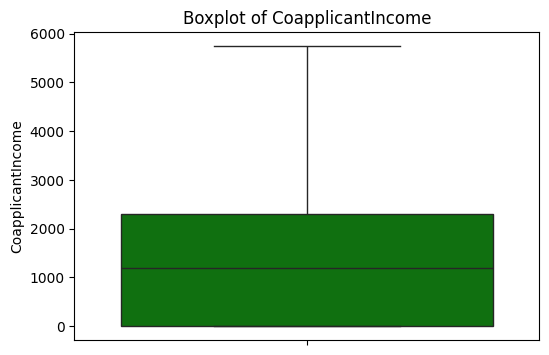

Skewness of LoanAmount is 0.6836926591947383


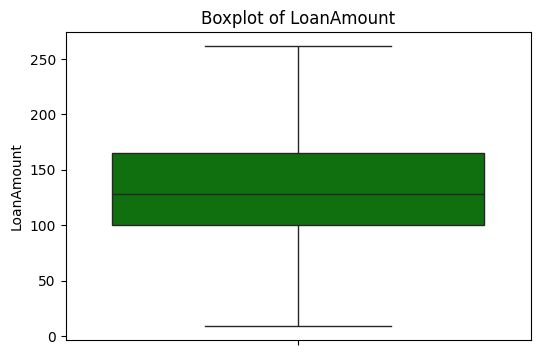

Skewness of Loan_Amount_Term is 0.0


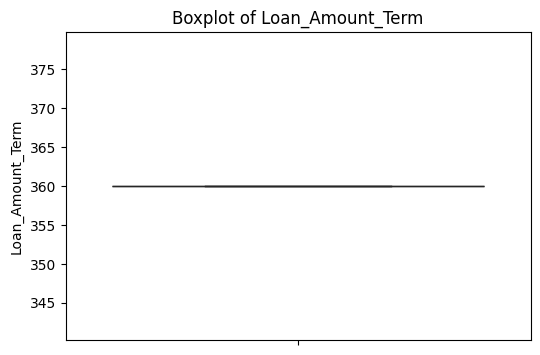

Skewness of Credit_History is 0.0


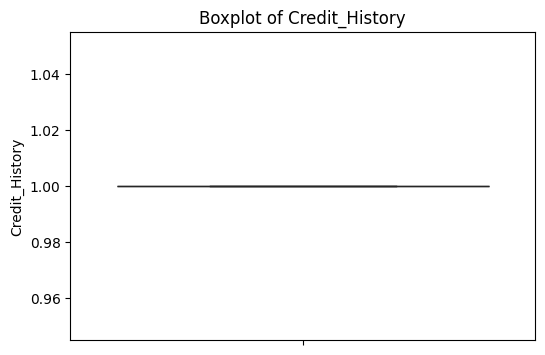

In [ ]:
# Check again the Boxplot for outliers after the outlier cap in the numerical columns of the new dataset
import seaborn as sns
import matplotlib.pyplot as plt
for i in new_data_numerical:
  plt.figure(figsize=(6,4))
  sns.boxplot(y=new_data[new_data_numerical][i],color='green')
  plt.title('Boxplot of '+ i)
  print('\033[1m' + f"Skewness of {i} is {new_data[new_data_numerical][i].skew()}"+ '\033[0m')
  plt.show()

# Now there are no outliers in the numerical columns after the outlier cap

###6. Transformation to change the different skewness in data

In [ ]:
import numpy as np
# The following will show the skewness in the numerical columns of new dataset
new_data[new_data_numerical].skew()

,0
ApplicantIncome,1.039846
CoapplicantIncome,1.012763
LoanAmount,0.683693
Loan_Amount_Term,0.000000
Credit_History,0.000000


From the above skewness data, only the following columns required data transformation to adjust the skewness
1. ApplicantIncome
2. CoapplicantIncome
3. LoanAmount

The above 3 columns are positively skewed

1. For ApplicantIncome & CoapplicantIncome, the current skewness is between 1 and 2, we can use square root transformation
2. For LoanAmount, the current skewness is between 0.5 and 1, we can use cube root transformation
3. Loan_Amount_Term & Credit_History doesn't require any transformation as their skeness is between -0.5 and 0.5

In [ ]:
# Before applying transformation, the skewness in the Column - ApplicantIncome
new_data["ApplicantIncome"].skew()

np.float64(1.0398459567416636)

In [ ]:
# For ApplicantIncome, the current skewness is between 1 and 2, we can use square root transformation
new_data["ApplicantIncome"] = np.sqrt(new_data["ApplicantIncome"])

/tmp/ipython-input-1343763152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["ApplicantIncome"] = np.sqrt(new_data["ApplicantIncome"])


In [ ]:
# After applying transformation, the skewness in the Column - ApplicantIncome
new_data["ApplicantIncome"].skew()

# This value has come to the normaly distributed value range

np.float64(0.5407405359801637)

In [ ]:
# Before applying transformation, the skewness in the Column - CoapplicantIncome
new_data["CoapplicantIncome"].skew()

np.float64(1.012762761452279)

In [ ]:
# For CoapplicantIncome, the current skewness is between 1 and 2, we can use square root transformation
new_data["CoapplicantIncome"] = np.sqrt(new_data["CoapplicantIncome"])

/tmp/ipython-input-3061355425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["CoapplicantIncome"] = np.sqrt(new_data["CoapplicantIncome"])


In [ ]:
# After applying transformation, the skewness in the Column - CoapplicantIncome
new_data["CoapplicantIncome"].skew()

# This value has come to the normaly distributed value range

np.float64(0.19282967978686388)

In [ ]:
# Before applying transformation, the skewness in the Column - LoanAmount
new_data["LoanAmount"].skew()

np.float64(0.6836926591947383)

In [ ]:
# For LoanAmount, the current skewness is between 0.5 and 1, we can use cube root transformation
new_data["LoanAmount"] = np.cbrt(new_data["LoanAmount"])

/tmp/ipython-input-1933463509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["LoanAmount"] = np.cbrt(new_data["LoanAmount"])


In [ ]:
# After applying transformation, the skewness in the Column - LoanAmount
new_data["LoanAmount"].skew()

# This value has come to the normaly distributed value range

np.float64(-0.20844465118655497)

In [ ]:
# The following will show the skewness in the new dataset after applying transformation
num_col_nd_trans = new_data.select_dtypes(include="number")
num_col_nd_trans.skew()

# The below result shows, all columns skewness values are now close to the normally distributed range. So no more transformations required

,0
ApplicantIncome,0.540741
CoapplicantIncome,0.192830
LoanAmount,-0.208445
Loan_Amount_Term,0.000000
Credit_History,0.000000


###8. Encoding

In [ ]:
# Display the categorical columns from the new dataset - new_data
new_data[new_data_categorical]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [ ]:
# Display categorical columns from the new dataset - new_data
new_data_categorical

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

Planning to apply the following encodings for each categorical columns,
1. Gender        - One-Hot
2. Married       - One-Hot
3. Education     - One-Hot
4. Self_Employed - One-Hot
5. Property_Area - One-Hot
6. Dependents    - Ordinal
7. Loan_Status   - Label

In [ ]:
# Assign the columns to be encoded with One-Hot into a variable
encoding_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [ ]:
# Apply One-Hot encoding to the new data set - new_data
new_data = pd.get_dummies(new_data,columns=encoding_cols,drop_first=True,dtype=int)

# Display the new dataset after encoding with One-Hot encoding for 5 categorical columns
new_data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,76.478755,0.000000,5.039684,360.0,1.0,Y,1,0,0,0,0,1
1,1,67.697858,38.832976,5.039684,360.0,1.0,N,1,1,0,0,0,0
2,0,54.772256,0.000000,4.041240,360.0,1.0,Y,1,1,0,1,0,1
3,0,50.823223,48.559242,4.932424,360.0,1.0,Y,1,1,1,0,0,1
4,0,77.459667,0.000000,5.204828,360.0,1.0,Y,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,53.851648,0.000000,4.140818,360.0,1.0,Y,0,0,0,0,0,0
610,3+,64.078077,0.000000,3.419952,360.0,1.0,Y,1,1,0,0,0,0
611,1,89.844310,15.491933,6.324704,360.0,1.0,Y,1,1,0,0,0,1
612,2,87.080423,0.000000,5.718479,360.0,1.0,Y,1,1,0,0,0,1


In [ ]:
# Apply Ordinal encoding to the column - Dependents in the new data set - new_data
from sklearn.preprocessing import OrdinalEncoder
# Assign the function OrdinalEncoder to a variable
oe = OrdinalEncoder(categories=[['0','1','2','3+']])

# Now convert Dependents as follows,
new_data["Dependents"] = oe.fit_transform(new_data[["Dependents"]])

# In fit_transform, the fit tries to read and understand the data and transform will change the data
# Note: Ordinal encoding preserves order (0 < 1 < 2 < 3+)

# Display the new dataset after applying Ordinal encoding for Dependents column
new_data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,76.478755,0.000000,5.039684,360.0,1.0,Y,1,0,0,0,0,1
1,1.0,67.697858,38.832976,5.039684,360.0,1.0,N,1,1,0,0,0,0
2,0.0,54.772256,0.000000,4.041240,360.0,1.0,Y,1,1,0,1,0,1
3,0.0,50.823223,48.559242,4.932424,360.0,1.0,Y,1,1,1,0,0,1
4,0.0,77.459667,0.000000,5.204828,360.0,1.0,Y,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,53.851648,0.000000,4.140818,360.0,1.0,Y,0,0,0,0,0,0
610,3.0,64.078077,0.000000,3.419952,360.0,1.0,Y,1,1,0,0,0,0
611,1.0,89.844310,15.491933,6.324704,360.0,1.0,Y,1,1,0,0,0,1
612,2.0,87.080423,0.000000,5.718479,360.0,1.0,Y,1,1,0,0,0,1


In [ ]:
# Apply Label encoding to the column - Loan_Status in the new data set - new_data
from sklearn.preprocessing import LabelEncoder

# Assign the function LabelEncoder to a variable
le = LabelEncoder()

# Now convert Loan_Status to 0 and 1 as follows,
new_data["Loan_Status"] = le.fit_transform(new_data["Loan_Status"])

# Display the new dataset after applying Label encoding for Loan_Status column
new_data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,76.478755,0.000000,5.039684,360.0,1.0,1,1,0,0,0,0,1
1,1.0,67.697858,38.832976,5.039684,360.0,1.0,0,1,1,0,0,0,0
2,0.0,54.772256,0.000000,4.041240,360.0,1.0,1,1,1,0,1,0,1
3,0.0,50.823223,48.559242,4.932424,360.0,1.0,1,1,1,1,0,0,1
4,0.0,77.459667,0.000000,5.204828,360.0,1.0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,53.851648,0.000000,4.140818,360.0,1.0,1,0,0,0,0,0,0
610,3.0,64.078077,0.000000,3.419952,360.0,1.0,1,1,1,0,0,0,0
611,1.0,89.844310,15.491933,6.324704,360.0,1.0,1,1,1,0,0,0,1
612,2.0,87.080423,0.000000,5.718479,360.0,1.0,1,1,1,0,0,0,1


###9. Scaling

In [ ]:
# Finally apply scaling to the features of the new dataset
# Features are ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term
# Only the features require scaling
# Other columns Credit_History, Loan_Status, Gender, Married, Education, Self_Employed, Property_Area doesn't require scaling as they are already in 0 and 1
# Dependents column can be considered for scaling, but it is optional (values range between 0 and 3 after transformation)
from sklearn.preprocessing import StandardScaler

# Assign the columns to be scaled in a variable
scale_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Apply the Standard Scalar function to the columns to be scaled in the new dataset - new_data
zscale = StandardScaler()
new_data[scale_cols] = pd.DataFrame(zscale.fit_transform(new_data[scale_cols]),columns=new_data[scale_cols].columns)

In [ ]:
# Display the new dataset - new_data after scaling
round(new_data)

# This data is completed in all means and its ready for Machine Learning

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,-1.0,-0.0,0.0,1.0,1,1,0,0,0,0,1
1,1.0,0.0,0.0,-0.0,0.0,1.0,0,1,1,0,0,0,0
2,0.0,-1.0,-1.0,-1.0,0.0,1.0,1,1,1,0,1,0,1
3,0.0,-1.0,1.0,-0.0,0.0,1.0,1,1,1,1,0,0,1
4,0.0,1.0,-1.0,0.0,0.0,1.0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,-1.0,-1.0,-1.0,0.0,1.0,1,0,0,0,0,0,0
610,3.0,-0.0,-1.0,-2.0,0.0,1.0,1,1,1,0,0,0,0
611,1.0,1.0,-0.0,2.0,0.0,1.0,1,1,1,0,0,0,1
612,2.0,1.0,-1.0,1.0,0.0,1.0,1,1,1,0,0,0,1
